# **Preliminary: Install and Import Packages**

In [1]:
!pip install kaggle
import os


os.environ['KAGGLE_USERNAME'] = 'zn2222'
os.environ['KAGGLE_KEY'] = '5cb10e85beb74201628848dbe07b4874'


# **Query Data**

Query Data from the Source:
https://www.kaggle.com/competitions/playground-series-s4e2/data


In [2]:
!kaggle competitions download -c playground-series-s4e2
!unzip playground-series-s4e2.zip



  0% 0.00/917k [00:00<?, ?B/s]
100% 917k/917k [00:00<00:00, 98.1MB/s]
Archive:  playground-series-s4e2.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('train.csv')
df = df.drop('id', axis=1)


# **Inspect Data**

In [4]:
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
8,Male,17.000000,1.700000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,3.000000,yes,1.000000,1.000000,no,Public_Transportation,Overweight_Level_I
9,Female,26.000000,1.638836,111.275646,yes,yes,3.000000,3.000000,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
df.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II
20757,Male,26.680376,1.816547,118.134898,yes,yes,3.000000,3.000000,Sometimes,no,2.003563,no,0.684487,0.713823,Sometimes,Public_Transportation,Obesity_Type_II


In [6]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             

In [8]:
features = df.drop('NObeyesdad', axis=1)
labels = pd.DataFrame(df['NObeyesdad'])

In [9]:
mask_numeric = features.dtypes == float
df_numerical = features.loc[:, mask_numeric]

df_numerical

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721
...,...,...,...,...,...,...,...,...
20753,25.137087,1.766626,114.187096,2.919584,3.000000,2.151809,1.330519,0.196680
20754,18.000000,1.710000,50.000000,3.000000,4.000000,1.000000,2.000000,1.000000
20755,20.101026,1.819557,105.580491,2.407817,3.000000,2.000000,1.158040,1.198439
20756,33.852953,1.700000,83.520113,2.671238,1.971472,2.144838,0.000000,0.973834


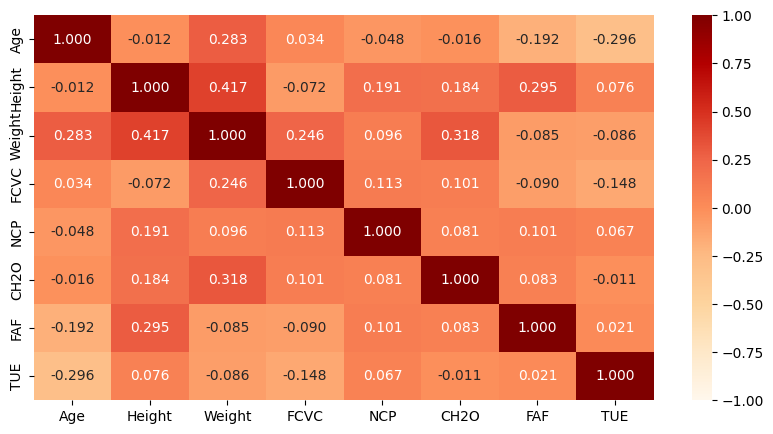

In [10]:
corr_numerical = df_numerical.corr()

import seaborn as sns

plt.figure(figsize=(10, 5))
sns.heatmap(corr_numerical, annot=True, cmap="OrRd", fmt='.3f', cbar=True, vmin=-1, vmax=1)
plt.show()

In [11]:
mask_categorical = features.dtypes != float
df_categorical = features.loc[:, mask_categorical]

for i in range(df_categorical.shape[1]):
    print(df_categorical.iloc[:, i].value_counts())

Female    10422
Male      10336
Name: Gender, dtype: int64
yes    17014
no      3744
Name: family_history_with_overweight, dtype: int64
yes    18982
no      1776
Name: FAVC, dtype: int64
Sometimes     17529
Frequently     2472
Always          478
no              279
Name: CAEC, dtype: int64
no     20513
yes      245
Name: SMOKE, dtype: int64
no     20071
yes      687
Name: SCC, dtype: int64
Sometimes     15066
no             5163
Frequently      529
Name: CALC, dtype: int64
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: MTRANS, dtype: int64


In [12]:
df_encoded = df_categorical.copy(deep=True)

# label encoding
df_encoded['Gender'] = df_categorical['Gender'].map({'Male':0, 'Female':1})
df_encoded['family_history_with_overweight'] = df_categorical['family_history_with_overweight'].map({'no':0, 'yes':1})
df_encoded['FAVC'] = df_categorical['FAVC'].map({'no':0, 'yes':1})
df_encoded['CAEC'] = df_categorical['CAEC'].map({'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3})
df_encoded['SMOKE'] = df_categorical['SMOKE'].map({'no':0, 'yes':1})
df_encoded['SCC'] = df_categorical['SCC'].map({'no':0, 'yes':1})
df_encoded['CALC'] = df_categorical['CALC'].map({'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3})

# one-hot encoding
df_onehot = pd.get_dummies(df_categorical['MTRANS']).astype(int)
df_encoded.drop('MTRANS', axis=1, inplace=True)

# concatenate
# one feature of df_encoded is redundant; we can remove it
df_encoded = pd.concat([df_encoded, df_onehot.iloc[:, 0:-1]], axis=1)

df_encoded

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,Automobile,Bike,Motorbike,Public_Transportation
0,0,1,1,1,0,0,1,0,0,0,1
1,1,1,1,2,0,0,0,1,0,0,0
2,1,1,1,1,0,0,0,0,0,0,1
3,1,1,1,1,0,0,1,0,0,0,1
4,0,1,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
20753,0,1,1,1,0,0,1,0,0,0,1
20754,0,0,1,2,0,0,1,0,0,0,1
20755,0,1,1,1,0,0,0,0,0,0,1
20756,0,1,1,1,0,0,0,1,0,0,0


In [13]:
df_all_features = pd.concat([df_numerical, df_encoded], axis=1)

df_all_features

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,Automobile,Bike,Motorbike,Public_Transportation
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,0,1,1,1,0,0,1,0,0,0,1
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1,1,1,2,0,0,0,1,0,0,0
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,1,1,1,1,0,0,0,0,0,0,1
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,1,1,1,1,0,0,1,0,0,0,1
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,0,1,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,25.137087,1.766626,114.187096,2.919584,3.000000,2.151809,1.330519,0.196680,0,1,1,1,0,0,1,0,0,0,1
20754,18.000000,1.710000,50.000000,3.000000,4.000000,1.000000,2.000000,1.000000,0,0,1,2,0,0,1,0,0,0,1
20755,20.101026,1.819557,105.580491,2.407817,3.000000,2.000000,1.158040,1.198439,0,1,1,1,0,0,0,0,0,0,1
20756,33.852953,1.700000,83.520113,2.671238,1.971472,2.144838,0.000000,0.973834,0,1,1,1,0,0,0,1,0,0,0


In [14]:
def apply_preprocessing(data):
    features = data.copy(deep=True)

    # numerical dataframe
    mask_numeric = features.dtypes == float
    df_numerical = features.loc[:, mask_numeric]

    # categorical dataframe
    mask_categorical = features.dtypes != float
    df_categorical = features.loc[:, mask_categorical]

    # label encoding
    df_encoded = df_categorical.copy(deep=True)
    df_encoded['Gender'] = df_categorical['Gender'].map({'Male':0, 'Female':1})
    df_encoded['family_history_with_overweight'] = df_categorical['family_history_with_overweight'].map({'no':0, 'yes':1})
    df_encoded['FAVC'] = df_categorical['FAVC'].map({'no':0, 'yes':1})
    df_encoded['CAEC'] = df_categorical['CAEC'].map({'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3})
    df_encoded['SMOKE'] = df_categorical['SMOKE'].map({'no':0, 'yes':1})
    df_encoded['SCC'] = df_categorical['SCC'].map({'no':0, 'yes':1})
    df_encoded['CALC'] = df_categorical['CALC'].map({'no':0, 'Sometimes':1, 'Frequently':2, 'Always':3})

    # one-hot encoding
    df_onehot = pd.get_dummies(df_categorical['MTRANS']).astype(int)
    df_encoded.drop('MTRANS', axis=1, inplace=True)

    # concatenate
    # one feature of df_encoded is redundant; we can remove it
    df_encoded = pd.concat([df_encoded, df_onehot.iloc[:, 0:-1]], axis=1)

    df_all_features = pd.concat([df_numerical, df_encoded], axis=1)

    return df_all_features


In [15]:
df_test = pd.read_csv('test.csv', index_col=0)

df_test = apply_preprocessing(df_test)

print('Train columns', df_all_features.columns)
print('Test columns', df_test.columns)

assert all(df_test.columns ==  df_all_features.columns), "Columns in train and test dataset must be the same"

Train columns Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'Automobile', 'Bike', 'Motorbike',
       'Public_Transportation'],
      dtype='object')
Test columns Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'Automobile', 'Bike', 'Motorbike',
       'Public_Transportation'],
      dtype='object')


<ipython-input-16-ea64b22c3c78>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


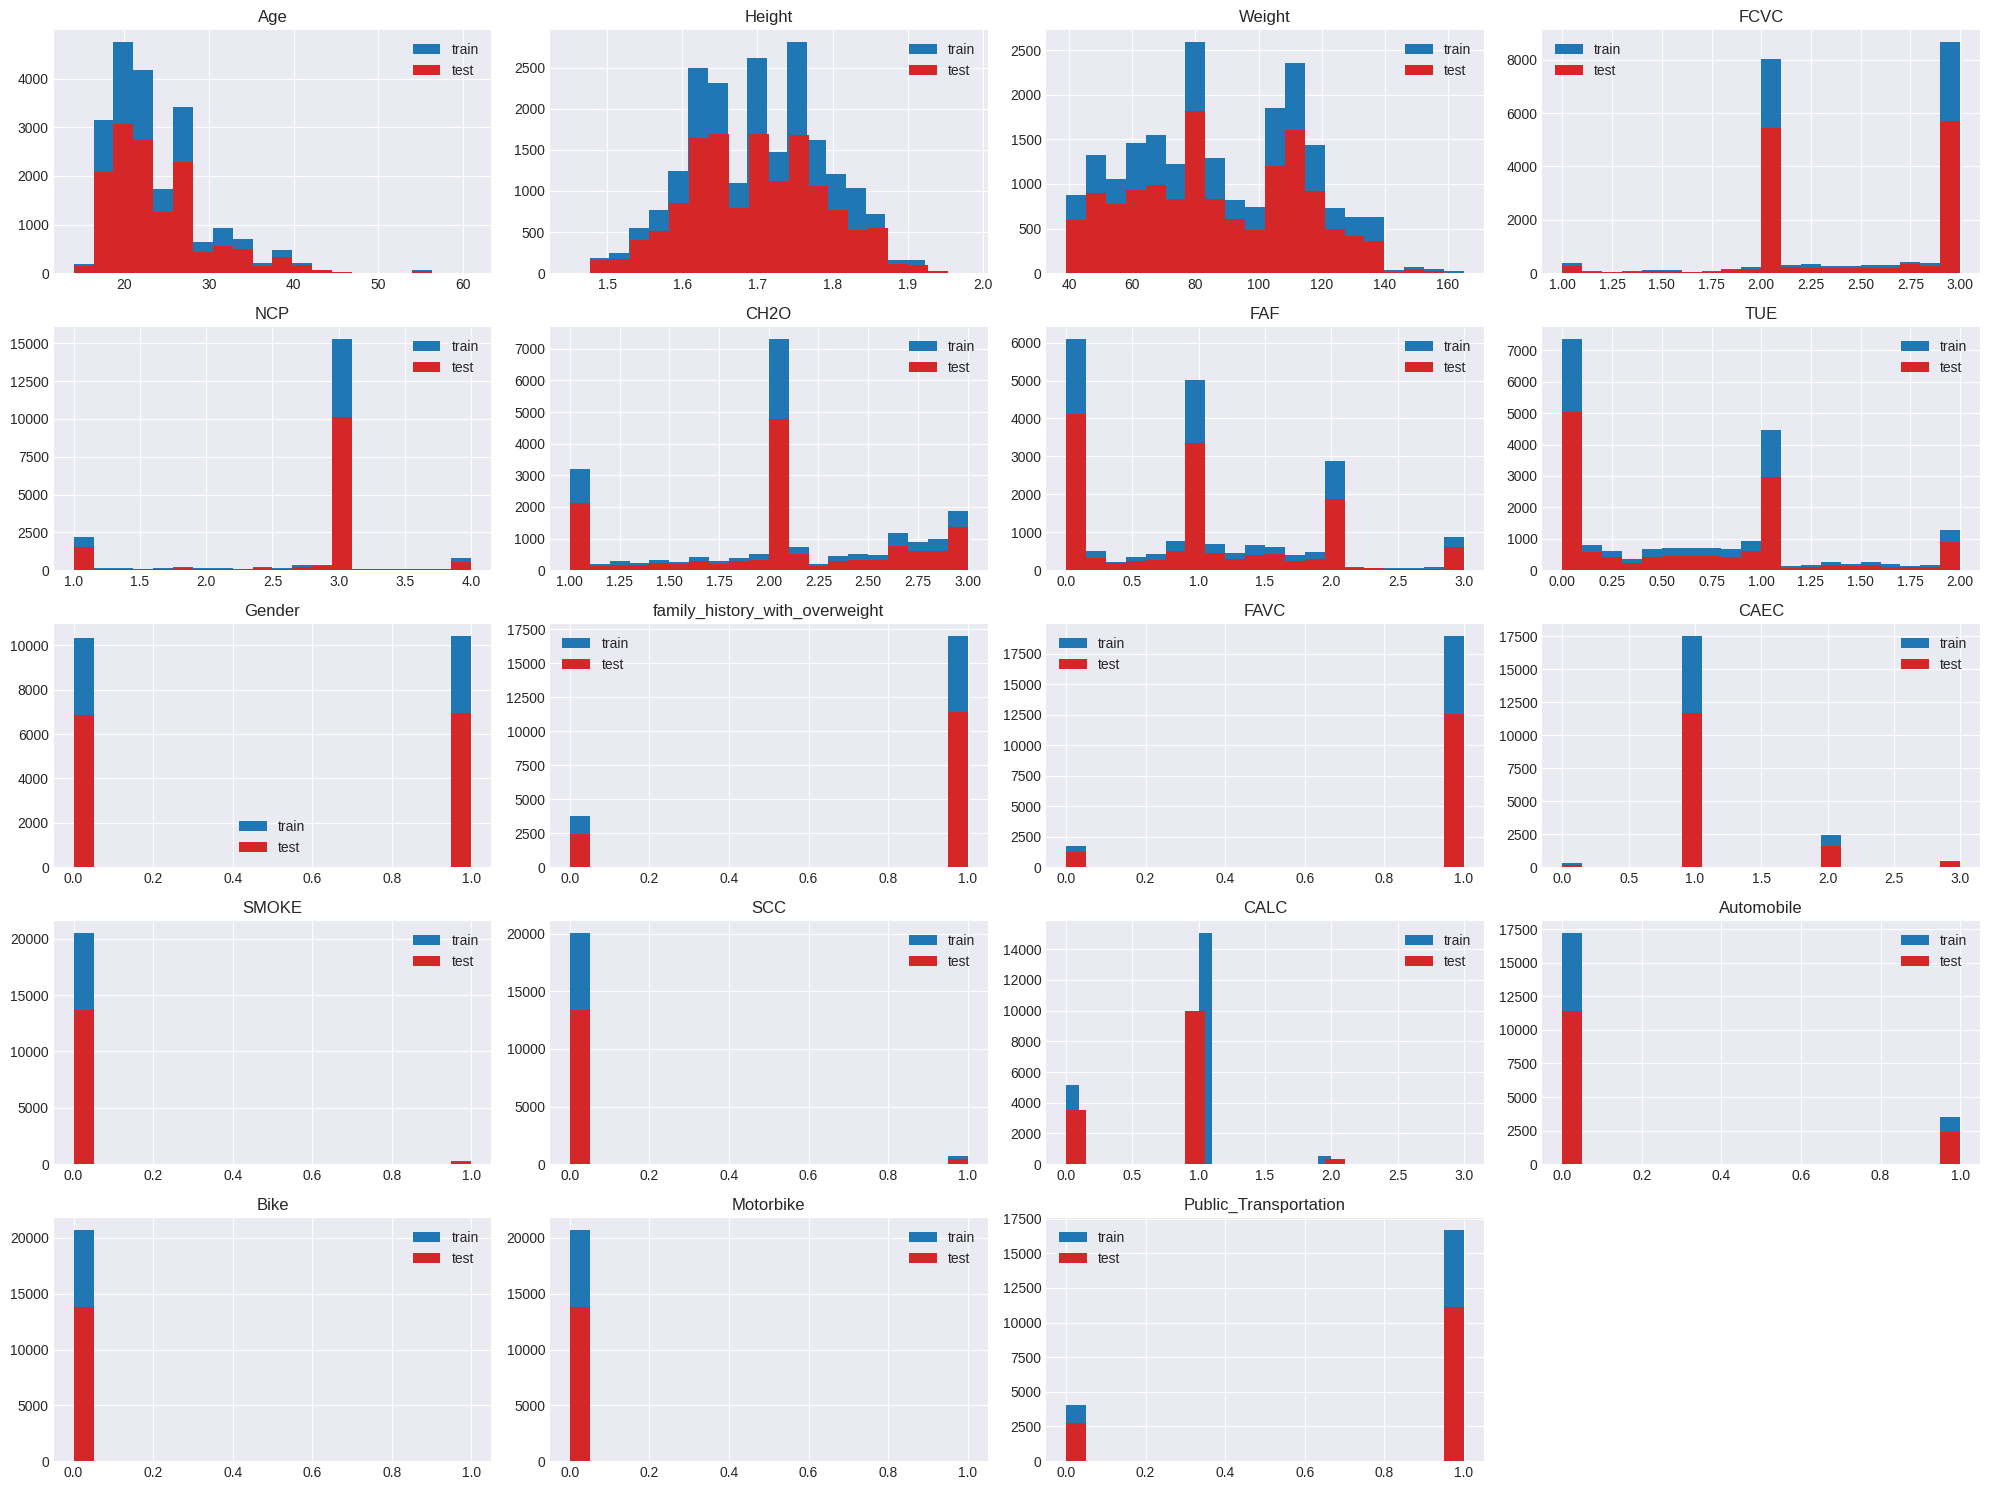

In [16]:
plt.style.use('seaborn-dark')

plt.figure(figsize=(20, 15))

for i in range(df_all_features.shape[1]):
    plt.subplot(5, 4, i+1)
    plt.hist(df_all_features.iloc[:, i], bins=20, label='train')
    plt.hist(df_test.iloc[:, i], bins=20,
             alpha=1, label='test', color='C3')
    plt.title(df_all_features.columns[i])
    plt.grid()
    plt.legend()
plt.tight_layout()
plt.show()

In [17]:
labels['NObeyesdad'].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

In [18]:
labels_encoded = labels.copy(deep=True)

dict_conversion = {'Insufficient_Weight':0,
                   'Normal_Weight':1,
                   'Overweight_Level_I':2,
                   'Overweight_Level_II':3,
                   'Obesity_Type_I':4,
                   'Obesity_Type_II':5,
                   'Obesity_Type_III':6}

labels_encoded['NObeyesdad'] = labels_encoded['NObeyesdad'].map(dict_conversion)
labels_encoded

,NObeyesdad
0,3
1,1
2,0
3,6
4,3
...,...
20753,5
20754,0
20755,5
20756,3


In [19]:
labels_encoded.value_counts()

NObeyesdad
6             4046
5             3248
1             3082
4             2910
0             2523
3             2522
2             2427
dtype: int64

<ipython-input-20-257cd961acf4>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


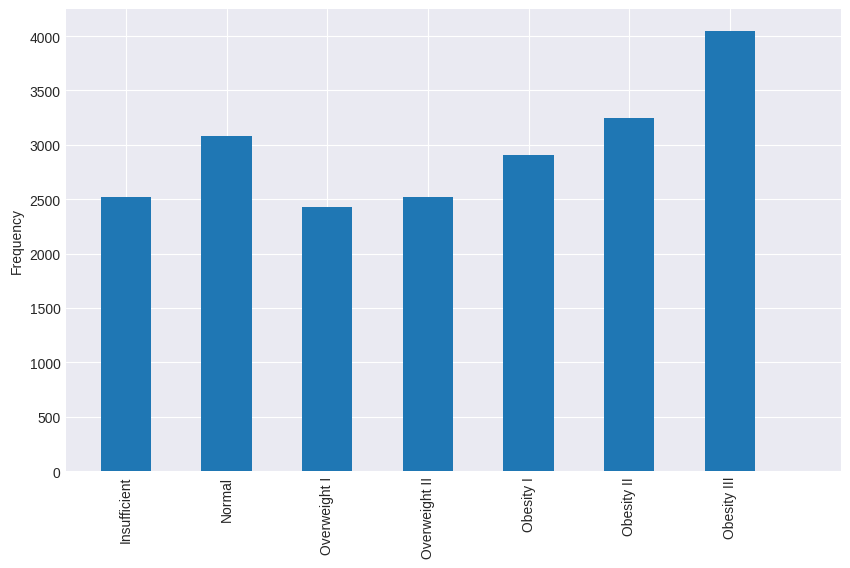

In [20]:
plt.style.use('seaborn-dark')

plt.figure(figsize=(10, 6))
plt.hist(labels_encoded, bins=np.arange(0, 8)-0.25, width=0.5, align='mid')
plt.grid()
plt.xticks(np.arange(0, 6.1),
           ['Insufficient', 'Normal', 'Overweight I', 'Overweight II', 'Obesity I', 'Obesity II', 'Obesity III'],
           rotation=90)
plt.ylabel('Frequency')
plt.show()

In [21]:
X = df_all_features
y = np.ravel(labels_encoded)

# compare train and test data
X_test = df_test
assert all(X_test.columns == X.columns), "Columns of training and test data must be the same"

print('Number of samples', len(X))
print('Number of featires', X.shape[1])

from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X, y,
                                                                test_size=0.2,
                                                                random_state=42,
                                                                stratify=y)

Number of samples 20758
Number of featires 19


In [22]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 3.3 MB/s eta 0:00:00


In [23]:
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from catboost import CatBoostClassifier, Pool
from xgboost import XGBClassifier

clf1 = GradientBoostingClassifier()
clf2 = RandomForestClassifier(class_weight='balanced')
clf3 = LGBMClassifier(class_weight='balanced')
clf4 = XGBClassifier()

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2047
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 19
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [24]:
from sklearn.model_selection import cross_val_score

def evaluate_model_cv(clf, X, y, cv=5):
    scores = cross_val_score(clf, X, y, cv=cv)
    mean_score = np.mean(scores)
    return mean_score

# Dictionary to hold model names and instances
models = {
    'Gradient Boosting': clf1,
    'Random Forest': clf2,
    'LightGBM': clf3,
    'XGBoost': clf4
}

# Dictionary to hold model evaluation scores
evaluation_results = {}

# Evaluate each model using cross-validation
for name, model in models.items():
    mean_score = evaluate_model_cv(model, X, y)
    evaluation_results[name] = mean_score

# Print results in markdown table format
print("| Model | Mean Accuracy |")
print("|-------|---------------|")
for name, score in evaluation_results.items():
    print(f"| {name} | {score:.3f} |")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2046
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 19
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2048
[LightGBM

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define a function to calculate evaluation metrics for a given model
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    return accuracy, precision, recall, f1

# Calculate evaluation metrics for each model
metrics_results = {}
for name, model in models.items():
    y_pred = model.predict(X_validation)
    metrics_results[name] = calculate_metrics(y_validation, y_pred)

# Print results in markdown table format
print("|    | Model     | Accuracy | Precision | Recall | F1-score |")
print("|====|===========|==========|===========|========|==========|")
for i, (name, metrics) in enumerate(metrics_results.items()):
    print(f"| {i} | {name} | {metrics[0]:.3f} | {metrics[1]:.3f} | {metrics[2]:.3f} | {metrics[3]:.3f} |")


|    | Model     | Accuracy | Precision | Recall | F1-score |
|====|===========|==========|===========|========|==========|
| 0 | Gradient Boosting | 0.903 | 0.893 | 0.892 | 0.892 |
| 1 | Random Forest | 0.895 | 0.884 | 0.883 | 0.882 |
| 2 | LightGBM | 0.905 | 0.895 | 0.894 | 0.894 |
| 3 | XGBoost | 0.905 | 0.895 | 0.894 | 0.894 |


In [27]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.1 MB/s eta 0:00:00


In [28]:
import optuna
from sklearn.model_selection import cross_validate

def objective(trial):
    max_depth = trial.suggest_int('max_depth', 4, 10)
    n_estimators = trial.suggest_int('n_estimators', 500, 2000)
    gamma = trial.suggest_float('gamma', 0, 1)
    reg_alpha = trial.suggest_float('reg_alpha', 0, 1)
    reg_lambda = trial.suggest_float('reg_lambda', 0, 1)
    min_child_weight = trial.suggest_int('min_child_weight', 0, 10)
    subsample = trial.suggest_float('subsample', 0, 1)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0, 1)
    learning_rate = trial.suggest_float('learning_rate', 0, 1)

    print('Training the model with', X.shape[1], 'features')

    # XGBoost
    params = {'n_estimators': n_estimators,
              'learning_rate': learning_rate,
              'gamma': gamma,
              'reg_alpha': reg_alpha,
              'reg_lambda': reg_lambda,
              'max_depth': max_depth,
              'min_child_weight': min_child_weight,
              'subsample': subsample,
              'colsample_bytree': colsample_bytree,
              'eval_metric':'mlogloss'}

    clf = XGBClassifier(**params)

    cv_results = cross_validate(clf, X, y, cv=5, scoring='accuracy')

    validation_score = np.mean(cv_results['test_score'])

    return validation_score

In [30]:
# Uncomment this section if you want to do hyperparameter tuning

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

[I 2024-02-27 17:49:06,592] A new study created in memory with name: no-name-458bacb1-8fa2-4b8e-ae31-d191a118ddc5


Training the model with 19 features


[I 2024-02-27 17:50:11,895] Trial 0 finished with value: 0.8985932191746169 and parameters: {'max_depth': 6, 'n_estimators': 1064, 'gamma': 0.6872937924519796, 'reg_alpha': 0.45498390569055747, 'reg_lambda': 0.35068615304729933, 'min_child_weight': 5, 'subsample': 0.5930651639917093, 'colsample_bytree': 0.5072828685090522, 'learning_rate': 0.703120772200156}. Best is trial 0 with value: 0.8985932191746169.


Training the model with 19 features


[I 2024-02-27 17:51:42,054] Trial 1 finished with value: 0.8769147369833116 and parameters: {'max_depth': 9, 'n_estimators': 1375, 'gamma': 0.7718689463651465, 'reg_alpha': 0.3557560047935042, 'reg_lambda': 0.5835899619826541, 'min_child_weight': 7, 'subsample': 0.22066108451094346, 'colsample_bytree': 0.6485987349493375, 'learning_rate': 0.7732388789507754}. Best is trial 0 with value: 0.8985932191746169.


Training the model with 19 features


[I 2024-02-27 17:53:00,435] Trial 2 finished with value: 0.910203393661903 and parameters: {'max_depth': 8, 'n_estimators': 1361, 'gamma': 0.4156775468698478, 'reg_alpha': 0.2718510214937857, 'reg_lambda': 0.3019887158499319, 'min_child_weight': 1, 'subsample': 0.9637063125744549, 'colsample_bytree': 0.4801102542112554, 'learning_rate': 0.13793556229769344}. Best is trial 2 with value: 0.910203393661903.


Training the model with 19 features


[I 2024-02-27 17:54:07,299] Trial 3 finished with value: 0.9051451492293104 and parameters: {'max_depth': 4, 'n_estimators': 1350, 'gamma': 0.6133175671229046, 'reg_alpha': 0.7131805497296253, 'reg_lambda': 0.6276198948465289, 'min_child_weight': 8, 'subsample': 0.6453970173401498, 'colsample_bytree': 0.3444218452393141, 'learning_rate': 0.5410875321226075}. Best is trial 2 with value: 0.910203393661903.


Training the model with 19 features


[I 2024-02-27 17:55:17,245] Trial 4 finished with value: 0.9034591219053004 and parameters: {'max_depth': 7, 'n_estimators': 1424, 'gamma': 0.2643098583337862, 'reg_alpha': 0.3208580151500007, 'reg_lambda': 0.8702651663164837, 'min_child_weight': 2, 'subsample': 0.9129272779683182, 'colsample_bytree': 0.391030815528117, 'learning_rate': 0.7303761948405312}. Best is trial 2 with value: 0.910203393661903.


Training the model with 19 features


[I 2024-02-27 17:56:12,859] Trial 5 finished with value: 0.8564407374038524 and parameters: {'max_depth': 5, 'n_estimators': 902, 'gamma': 0.0546018296372941, 'reg_alpha': 0.3904734697075207, 'reg_lambda': 0.6201026107914204, 'min_child_weight': 1, 'subsample': 0.02868152706001248, 'colsample_bytree': 0.2175459646349185, 'learning_rate': 0.5117530079023555}. Best is trial 2 with value: 0.910203393661903.


Training the model with 19 features


[I 2024-02-27 17:57:10,790] Trial 6 finished with value: 0.884237554012335 and parameters: {'max_depth': 5, 'n_estimators': 929, 'gamma': 0.2331407075112798, 'reg_alpha': 0.7933999200089198, 'reg_lambda': 0.23318195126886299, 'min_child_weight': 7, 'subsample': 0.042040673782745785, 'colsample_bytree': 0.7428006972467363, 'learning_rate': 0.4016198714240726}. Best is trial 2 with value: 0.910203393661903.


Training the model with 19 features


[I 2024-02-27 17:59:11,805] Trial 7 finished with value: 0.884333533391912 and parameters: {'max_depth': 8, 'n_estimators': 1758, 'gamma': 0.2747016548943, 'reg_alpha': 0.5767162848756274, 'reg_lambda': 0.24748826157705783, 'min_child_weight': 4, 'subsample': 0.3287089517068801, 'colsample_bytree': 0.778295910582325, 'learning_rate': 0.8005854796918731}. Best is trial 2 with value: 0.910203393661903.


Training the model with 19 features


[I 2024-02-27 18:00:02,369] Trial 8 finished with value: 0.8903074867861541 and parameters: {'max_depth': 7, 'n_estimators': 1032, 'gamma': 0.6490701011737083, 'reg_alpha': 0.052545500972910664, 'reg_lambda': 0.028153113886035808, 'min_child_weight': 10, 'subsample': 0.37842615526843304, 'colsample_bytree': 0.0970142846629296, 'learning_rate': 0.8674583877176262}. Best is trial 2 with value: 0.910203393661903.


Training the model with 19 features


[I 2024-02-27 18:00:50,906] Trial 9 finished with value: 0.902977240667685 and parameters: {'max_depth': 7, 'n_estimators': 737, 'gamma': 0.6119223126157293, 'reg_alpha': 0.44539842539700414, 'reg_lambda': 0.9117954465541934, 'min_child_weight': 2, 'subsample': 0.4151441471755507, 'colsample_bytree': 0.8583531100470498, 'learning_rate': 0.2592924220401712}. Best is trial 2 with value: 0.910203393661903.


In [31]:
df_study = study.trials_dataframe()
df_study = df_study.sort_values(by='value', ascending=False)

df_study.head()

,number,value,datetime_start,datetime_complete,duration,params_colsample_bytree,params_gamma,params_learning_rate,params_max_depth,params_min_child_weight,params_n_estimators,params_reg_alpha,params_reg_lambda,params_subsample,state
2,2,0.910203,2024-02-27 17:51:42.056197,2024-02-27 17:53:00.435396,0 days 00:01:18.379199,0.480110,0.415678,0.137936,8,1,1361,0.271851,0.301989,0.963706,COMPLETE
3,3,0.905145,2024-02-27 17:53:00.438011,2024-02-27 17:54:07.298954,0 days 00:01:06.860943,0.344422,0.613318,0.541088,4,8,1350,0.713181,0.627620,0.645397,COMPLETE
4,4,0.903459,2024-02-27 17:54:07.301361,2024-02-27 17:55:17.244793,0 days 00:01:09.943432,0.391031,0.264310,0.730376,7,2,1424,0.320858,0.870265,0.912927,COMPLETE
9,9,0.902977,2024-02-27 18:00:02.371319,2024-02-27 18:00:50.906063,0 days 00:00:48.534744,0.858353,0.611922,0.259292,7,2,737,0.445398,0.911795,0.415144,COMPLETE
0,0,0.898593,2024-02-27 17:49:06.599781,2024-02-27 17:50:11.895210,0 days 00:01:05.295429,0.507283,0.687294,0.703121,6,5,1064,0.454984,0.350686,0.593065,COMPLETE


In [32]:
#best_params_XGB = study.best_params

# Best parameters for XGBoost obtained after Optuna optimization
best_params_XGB = {'max_depth': 8,
                   'n_estimators': 1361,
                   'gamma': 0.415678,
                   'reg_alpha': 0.271851,
                   'reg_lambda': 0.301989,
                   'min_child_weight': 1,
                   'subsample': 0.963706,
                   'colsample_bytree': 0.480110,
                   'learning_rate': 0.137936}

print(best_params_XGB)

{'max_depth': 8, 'n_estimators': 1361, 'gamma': 0.415678, 'reg_alpha': 0.271851, 'reg_lambda': 0.301989, 'min_child_weight': 1, 'subsample': 0.963706, 'colsample_bytree': 0.48011, 'learning_rate': 0.137936}


In [33]:
# train the best model

clf = XGBClassifier(**best_params_XGB)


clf.fit(X, y)


predictions = clf.predict(X_test)

In [51]:
predictions = clf.predict(X_test)

# Calculate metrics
accuracy, precision, recall, f1 = calculate_metrics(y_validation, y_pred)

# Print metrics
print("| Metric     | Value |")
print("|============|=======|")
print(f"| Accuracy   | {accuracy:.3f} |")
print(f"| Precision  | {precision:.3f} |")
print(f"| Recall     | {recall:.3f} |")
print(f"| F1-score   | {f1:.3f} |")

| Metric     | Value |
|============|=======|
| Accuracy   | 0.905 |
| Precision  | 0.895 |
| Recall     | 0.894 |
| F1-score   | 0.894 |


In [34]:

reverse_dict_conversion = dict(zip(dict_conversion.values(), dict_conversion.keys()))

df_submission = pd.read_csv('sample_submission.csv')

df_submission['NObeyesdad'] = predictions
df_submission['NObeyesdad'] = df_submission['NObeyesdad'].map(reverse_dict_conversion)

df_submission.to_csv('submission.csv', index=False)

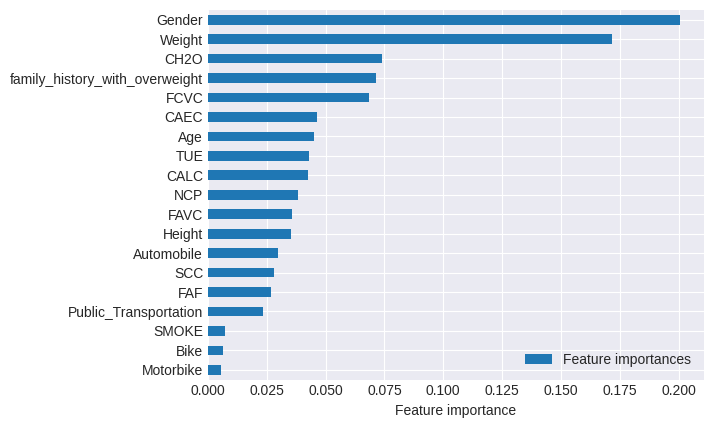

In [35]:
df_features = pd.DataFrame(clf.feature_importances_, index=X.columns, columns=['Feature importances'])
df_features = df_features.sort_values('Feature importances')

df_features.plot(kind='barh')
plt.grid()
plt.xlabel('Feature importance')
plt.show()

In [44]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 5.7 MB/s eta 0:00:00


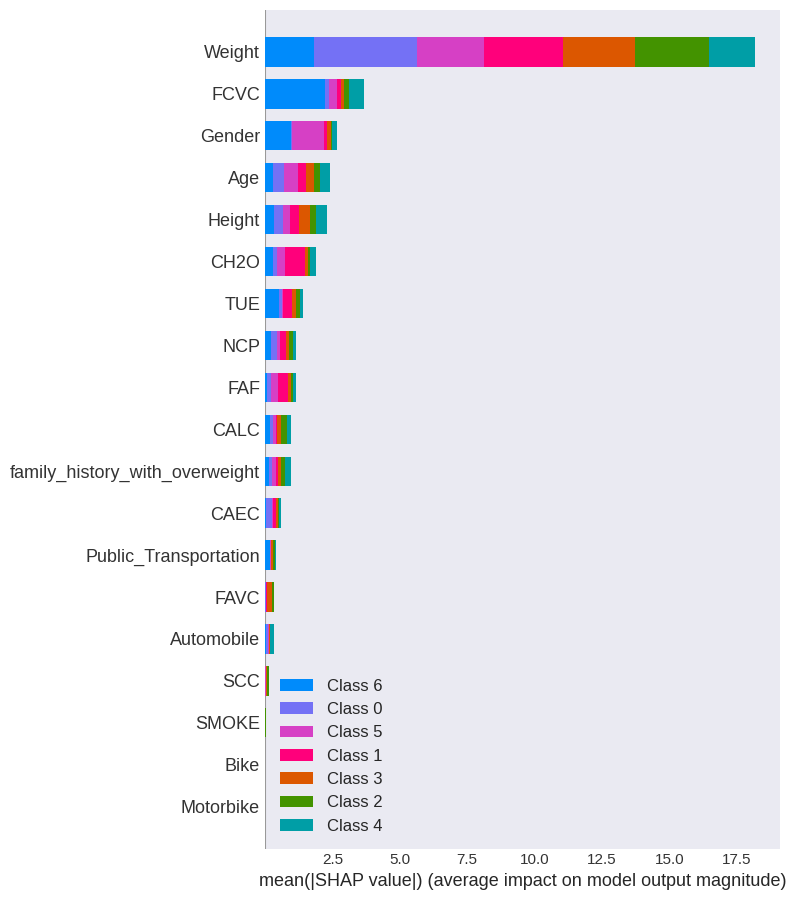

In [46]:
import shap

# Initialize the explainer with the model
explainer = shap.TreeExplainer(clf)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the summary plot using SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns.tolist())



In [36]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

def train_evaluate_model(X, y, X_test):
    # use Stratified KFold
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    skf.get_n_splits(X, y)

    scores = []
    predictions = []
    clfs = []

    for i, (train_index, val_index) in enumerate(skf.split(X, y)):
        print('Fitting with k-fold', i+1, 'out of', len(train_index))
        X_train = np.array(X)[train_index, :]
        y_train = np.array(y)[train_index]
        X_val = np.array(X)[val_index, :]
        y_val = np.array(y)[val_index]

        print('Training on', len(X_train), 'samples')
        print('Evaluating on', len(X_val), 'samples')

        clf = XGBClassifier(**best_params_XGB)
        clf.fit(X=X_train, y=y_train,
                eval_set=[(X_train, y_train), (X_val, y_val)],
                early_stopping_rounds=10,
                verbose=50)

        #clf = LGBMClassifier(**best_params_LGBM, verbose = -1, verbosity = -1)
        #clf.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)])

        y_pred_val = clf.predict(X_val)

        new_score = accuracy_score(y_val, y_pred_val)
        print('validation score is', new_score)
        scores.append(new_score)

        # store predictions
        y_pred_test_proba = clf.predict_proba(X_test)
        predictions.append(y_pred_test_proba)
        print('Round', i+1, 'Predictions stored successfully')

        clfs.append(clf)

    return scores, np.array(predictions), clfs


In [37]:
scores, predictions, clfs = train_evaluate_model(X, y, X_test)


Fitting with k-fold 1 out of 16606
Training on 16606 samples
Evaluating on 4152 samples
[0]	validation_0-mlogloss:1.71206	validation_1-mlogloss:1.72137


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[50]	validation_0-mlogloss:0.18554	validation_1-mlogloss:0.28092
[100]	validation_0-mlogloss:0.13429	validation_1-mlogloss:0.25337
[144]	validation_0-mlogloss:0.12496	validation_1-mlogloss:0.25196
validation score is 0.9154624277456648
Round 1 Predictions stored successfully
Fitting with k-fold 2 out of 16606
Training on 16606 samples
Evaluating on 4152 samples
[0]	validation_0-mlogloss:1.71192	validation_1-mlogloss:1.72119


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[50]	validation_0-mlogloss:0.18210	validation_1-mlogloss:0.30131
[100]	validation_0-mlogloss:0.13059	validation_1-mlogloss:0.27503
[150]	validation_0-mlogloss:0.12252	validation_1-mlogloss:0.27284
[189]	validation_0-mlogloss:0.12101	validation_1-mlogloss:0.27267
validation score is 0.9072736030828517
Round 2 Predictions stored successfully
Fitting with k-fold 3 out of 16606
Training on 16606 samples
Evaluating on 4152 samples
[0]	validation_0-mlogloss:1.71337	validation_1-mlogloss:1.71925


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[50]	validation_0-mlogloss:0.18438	validation_1-mlogloss:0.27906
[100]	validation_0-mlogloss:0.13291	validation_1-mlogloss:0.25081
[124]	validation_0-mlogloss:0.12651	validation_1-mlogloss:0.24904
validation score is 0.9144990366088632
Round 3 Predictions stored successfully
Fitting with k-fold 4 out of 16607
Training on 16607 samples
Evaluating on 4151 samples
[0]	validation_0-mlogloss:1.71406	validation_1-mlogloss:1.72062


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[50]	validation_0-mlogloss:0.18217	validation_1-mlogloss:0.29507
[100]	validation_0-mlogloss:0.12982	validation_1-mlogloss:0.27281
[134]	validation_0-mlogloss:0.12318	validation_1-mlogloss:0.27190
validation score is 0.9072512647554806
Round 4 Predictions stored successfully
Fitting with k-fold 5 out of 16607
Training on 16607 samples
Evaluating on 4151 samples
[0]	validation_0-mlogloss:1.71380	validation_1-mlogloss:1.72267


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[50]	validation_0-mlogloss:0.18424	validation_1-mlogloss:0.29361
[100]	validation_0-mlogloss:0.13101	validation_1-mlogloss:0.26792
[141]	validation_0-mlogloss:0.12289	validation_1-mlogloss:0.26567
validation score is 0.9094194170079499
Round 5 Predictions stored successfully


In [38]:
print('Average evaluation score = ', np.mean(scores))

Average evaluation score =  0.910781149840162


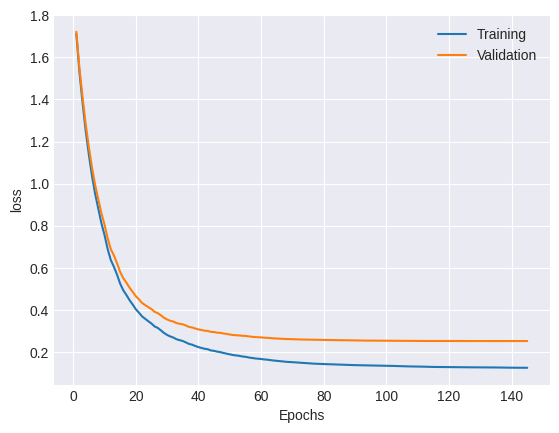

In [39]:
# this section works only for XGBoost

results = clfs[0].evals_result()

train_loss = results['validation_0']['mlogloss']
validation_loss = results['validation_1']['mlogloss']
epochs_grid = np.arange(1, len(train_loss)+1)

plt.plot(epochs_grid, train_loss, label='Training')
plt.plot(epochs_grid, validation_loss, label='Validation')
plt.legend()
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.grid()